1. Investiga un caso en la vida real donde podremos aplicar un modelo de Regresión Logística. Fundamenta.

dataset que utilizaremos para el trabajo práctico:

https://www.kaggle.com/datasets/abdallahwagih/spam-emails





2. Crea o selecciona un datasets que te permita entrenar tu modelo para abordar la problemática.  
3. Crea un modelo de regresión logística utilizando la librería Scikit Learn y entrenalo con los datos del datasets.  


4. Realiza un gráfico con la librería matplotlib de los datos de entrenamiento y las predicciones realizadas por el modelo.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Precisión del modelo: 0.96


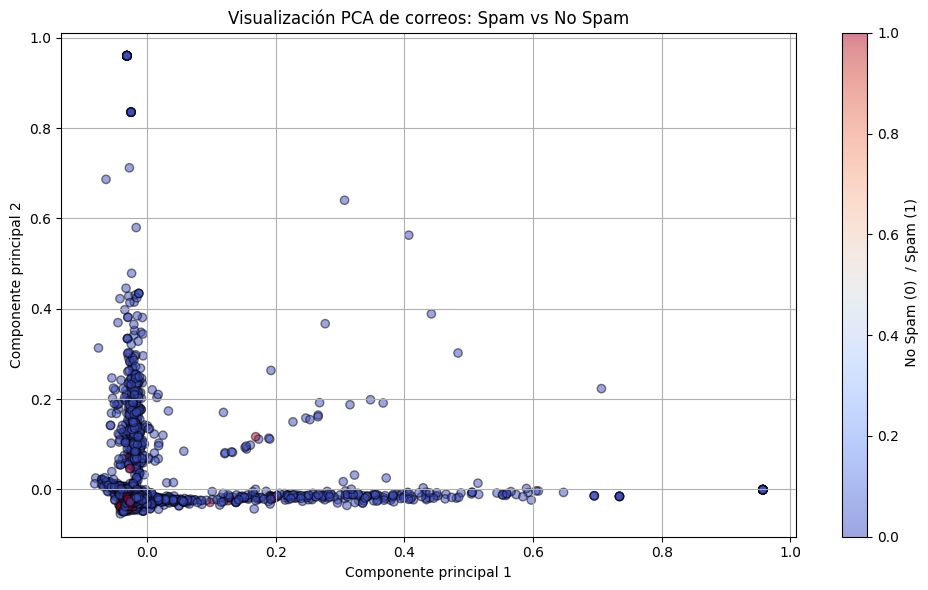

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cargamos el dataset
df = pd.read_csv("spam.csv")

# Columnas del dataset
X = df['Message']      # texto del correo
y = df['Category']     # etiqueta ('spam' o 'ham')

# Convertimos las etiquetas a 0 (ham) y 1 (spam)
y = y.map({'ham': 0, 'spam': 1})

# Vectorizar los correos con TF-IDF
vectorizador = TfidfVectorizer(stop_words='english')
X_vect = vectorizador.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Se realizan las predicciones
y_pred = modelo.predict(X_test)

# Se evalúa el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

# Graficamos para visualizar resultados con PCA (reducción a 2D)
pca = PCA(n_components=2)
X_reducido = pca.fit_transform(X_vect.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y, cmap='coolwarm', alpha=0.5, edgecolors='k')
plt.title("Visualización PCA de correos: Spam vs No Spam")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label=' No Spam (0)  / Spam (1)')
plt.grid(True)
plt.tight_layout()
plt.show()


**CONCLUSIÓN**

Muestra que hay superposición: algunos mensajes spam son similares a mensajes normales.

Esto explica por qué la clasificación nunca es perfecta.

En este gráfico vemos algo de mezcla, lo que es esperable en textos reales donde algunos mensajes spam se parecen mucho a correos legítimos